<a href="https://colab.research.google.com/github/VladislavSmekhnov/MNIST-by-Neurolink/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports of libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils as np_utils
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Load data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Examples's visualization

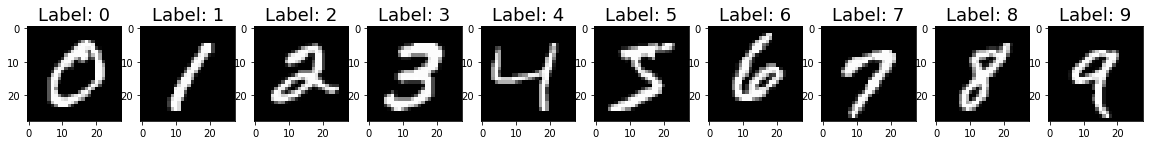

In [ ]:
num_classes = 10
f, axis = plt.subplots(1, num_classes, figsize = (20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  axis[i].imshow(sample, cmap='gray')
  axis[i].set_title("Label: {}".format(i), fontsize = 18)

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# Prepare data

In [ ]:
# Normalizing data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshaping data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Creating model - Fully connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation='relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25)) # 25% of neuros are deactivated during the training
                         # to prevent overfitting from the network
model.add(Dense(units = 10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training

In [ ]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 2s 5ms/step - loss: 0.6118 - accuracy: 0.8204
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2238 - accuracy: 0.9356
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1602 - accuracy: 0.9534
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1293 - accuracy: 0.9622
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1074 - accuracy: 0.9688
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0898 - accuracy: 0.9724
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0769 - accuracy: 0.9774
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0683 - accuracy: 0.9800
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0606 - accuracy: 0.9820
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0513 - accuracy: 0.9847

# Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 4ms/step - loss: 0.0716 - accuracy: 0.9771
Test loss: 0.07163938879966736, Test accuracy: 0.9771000146865845


In [ ]:
y_predict = model.predict(x_test)
y_predict_classes = np.argmax(y_predict, axis = 1)
print(y_predict_classes) # from highest probability -> to lowest

[7 2 1 ... 4 5 6]


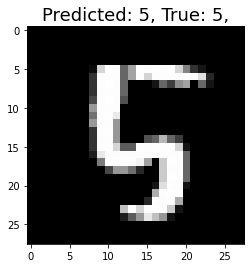

In [ ]:
#Single example

random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_prediction_class = y_predict_classes[random_index]

plt.title("Predicted: {}, True: {},".format(y_sample_prediction_class, y_sample_true), fontsize = 18)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

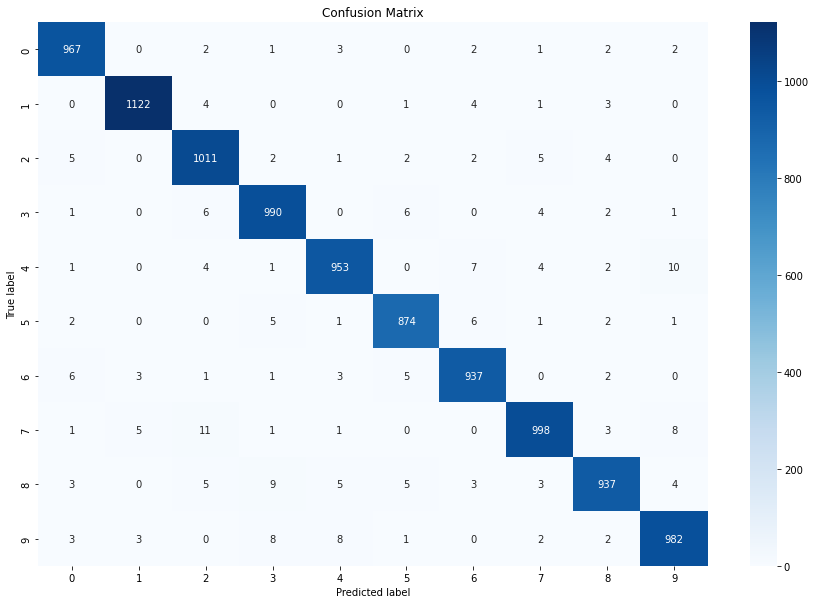

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_predict_classes)

# Plot

fig, axis = plt.subplots(figsize =(15, 10))
axis = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = axis, cmap='Blues')
axis.set_xlabel('Predicted label')
axis.set_ylabel('True label')
axis.set_title('Confusion Matrix')

# Investigating errors

In [ ]:
errors = (y_predict_classes - y_true != 0)
y_perdict_classes_errors = y_predict_classes[errors]
y_predict_errors = y_predict[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_predict_errors_probability = np.max(y_predict_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_predict_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_predict_errors_probability - true_probability_errors

# Get list of indices of sorted differences

sorted_index_diff_errors = np.argsort(diff_errors_pred_true)
top_index_diff_errors = sorted_index_diff_errors[-5:] # get 5 last ones

# Show top errors

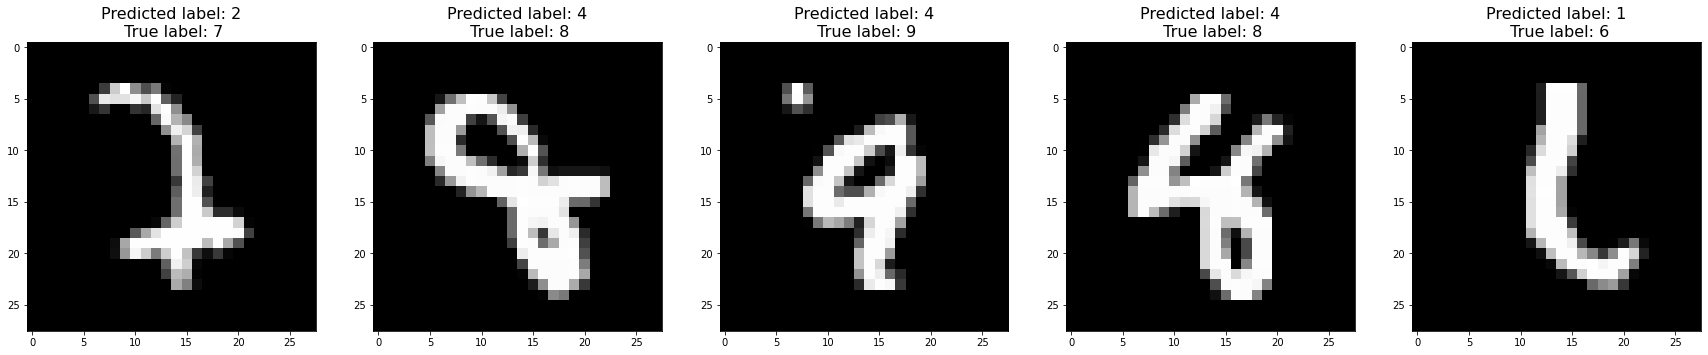

In [ ]:
num = len(top_index_diff_errors)
f, axis = plt.subplots(1, num, figsize=(30, 30))

for i in range(0, num):
  index = top_index_diff_errors[i]
  sample = x_test_errors[index].reshape(28, 28)
  y_t = y_true_errors[index]
  y_p = y_perdict_classes_errors[index]
  axis[i].imshow(sample, cmap='gray')
  axis[i].set_title("Predicted label: {}\n True label: {}".format(y_p, y_t), fontsize = 16)